# POC (Proof Of Concept)

In [12]:
import csv
import time
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Authentification avec les informations d'identification de l'API Spotify
client_id = "8acd261d7db54123918a6ef7d5a85836"
client_secret = "676b3681ac7a458991c45b4d0c608162"

client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Créer un fichier CSV pour stocker les données
with open("spotify_data.csv", "w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerow(["id", "title", "artist", "album", "release_date", "duration_ms", "popularity", "acousticness",
                     "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence", "genre"])

    # Liste des genres
    genres = ["pop", "rock", "rap", "electronic", "jazz", "classical"]

    # Récupérer les tracks recommandées pour chaque genre
    for genre in genres:
        for i in range(12):
            month = i + 1
            recommendations = sp.recommendations(seed_genres=[genre], limit=50, target_year=2022, target_month=month)

            # Récupérer les caractéristiques de chaque track recommandée
            for track in recommendations["tracks"]:
                track_id = track["id"]
                track_info = sp.track(track_id)
                artist_name = track_info["artists"][0]["name"]
                album_name = track_info["album"]["name"]
                release_date = track_info["album"]["release_date"]
                duration_ms = track_info["duration_ms"]
                popularity = track_info["popularity"]
                acousticness = track_info["acousticness"]
                danceability = track_info["danceability"]
                energy = track_info["energy"]
                instrumentalness = track_info["instrumentalness"]
                liveness = track_info["liveness"]
                loudness = track_info["loudness"]
                speechiness = track_info["speechiness"]
                tempo = track_info["tempo"]
                valence = track_info["valence"]
                
                writer.writerow([track_id, track["name"], artist_name, album_name, release_date, duration_ms, popularity,
                                 acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo,
                                 valence, genre])
                time.sleep(0.5)  # Respecter les limites de l'API Spotify

        print(f"{genre} terminé")

print("Terminé")


KeyError: 'acousticness'

In [ ]:
import pandas as pd

df_music_2022= pd.read_csv('audio_features_2022.csv')
df_music_2022 = df_music_2022.drop(columns="année")
columns_numeric =  list(df_music_2022.select_dtypes(include=['int', 'float']).columns)
df_music_2022_num = df_music_2022[columns_numeric]

In [ ]:
df_music_2022_num.columns

Index(['popularité', 'durée_ms', 'tonalité', 'mode', 'signature_temps',
       'acoustique', 'dansabilité', 'énergie', 'instrumentalité', 'vivacité',
       'loudness', 'parlant', 'valence', 'tempo'],
      dtype='object')

In [7]:
import pandas as pd

df = pd.read_csv("audio_features_2022_genre.csv")

In [8]:
# La target "charges"
y = df["popularity"]

# Les features
X = df.drop(["popularity"],axis=1)

# Affichage
X

,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,230667.0,1.0,0.0,4.0,0.032200,0.676,0.4610,0.000001,0.358,-6.746,0.1430,0.7150,87.917
1,188793.0,9.0,1.0,4.0,0.292000,0.573,0.5350,0.000000,0.156,-6.257,0.0297,0.3410,130.013
2,160467.0,7.0,1.0,4.0,0.000153,0.432,0.7960,0.002090,0.266,-7.262,0.0606,0.2710,141.868
3,111735.0,7.0,0.0,4.0,0.907000,0.639,0.2010,0.000023,0.124,-16.613,0.0526,0.4000,88.107
4,57470.0,7.0,1.0,5.0,0.974000,0.318,0.1470,0.000000,0.118,-10.711,0.0550,0.1390,87.136
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110084,40183.0,4.0,1.0,3.0,0.979000,0.118,0.0011,0.966000,0.109,-34.140,0.0422,0.0554,74.613
110085,489453.0,2.0,1.0,4.0,0.137000,0.362,0.5330,0.000000,0.358,-8.319,0.0313,0.0693,144.016
110086,474627.0,2.0,1.0,4.0,0.158000,0.356,0.5950,0.000020,0.753,-5.976,0.0350,0.0703,145.587
110087,95147.0,6.0,0.0,4.0,0.057700,0.708,0.6950,0.000000,0.263,-4.981,0.0835,0.6610,148.048


[learning_curve] Training set sizes: [ 7045 14091 21136 28182 35228 42273 49319 56364 63410 70456]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] END .................................................... total time=   6.1s
[CV] END .................................................... total time=  11.7s
[CV] END .................................................... total time=  17.1s
[CV] END .................................................... total time=  22.6s
[CV] END .................................................... total time=   6.4s
[CV] END .................................................... total time=  27.4s
[CV] END .................................................... total time=  32.8s
[CV] END .................................................... total time=  11.2s
[CV] END .................................................... total time=  38.9s
[CV] END .................................................... total time=  17.7s
[CV] END .................................................... total time=  43.6s
[CV] END .................................................... total time=  23.2s
[CV] END ...................

[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:  1.7min remaining:  1.7min


[CV] END .................................................... total time=  52.4s
[CV] END .................................................... total time=  11.6s
[CV] END .................................................... total time=  32.2s
[CV] END .................................................... total time=  16.6s
[CV] END .................................................... total time=  37.6s
[CV] END .................................................... total time=  42.0s
[CV] END .................................................... total time=  22.5s
[CV] END .................................................... total time=  46.5s
[CV] END .................................................... total time=  27.2s
[CV] END .................................................... total time=   5.9s
[CV] END .................................................... total time=  51.0s
[CV] END .................................................... total time=  33.1s
[CV] END ...................

[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.3min finished


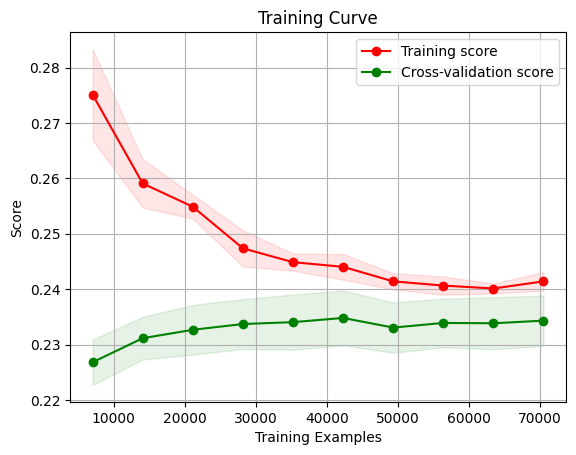

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import xgboost as xgb
import mlflow
import mlflow.sklearn
import numpy as np

# Définir le chemin de suivi MLflow
mlflow.set_tracking_uri("http://localhost:5000")

# Définir les paramètres de votre modèle
params = {
    "degree": 2,
    "learning_rate": 0.08,
    "max_depth": 2
}

# Créer le modèle
model = make_pipeline(PolynomialFeatures(degree=params["degree"]), xgb.XGBRegressor(
    learning_rate=params["learning_rate"], max_depth=params["max_depth"]))

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2, random_state=42)

# Entraîner le modèle
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Calculer la MAE
mae = mean_absolute_error(y_test, y_pred)
# Calculer le coefficient de détermination R2
r2 = r2_score(y_test, y_pred)

# Calculer l'erreur quadratique moyenne (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Commencer une nouvelle exécution de MLflow
with mlflow.start_run():

    # Enregistrer les paramètres
    mlflow.log_params(params)

    # Enregistrer le modèle
    mlflow.sklearn.log_model(model, "XGBRegressor_POC_2")

   # Enregistrer les métriques
    mlflow.log_metric("MAE", mae)
    mlflow.log_metric("r2_score", r2)
    mlflow.log_metric("neg_mean_squared_error", rmse)


# Generate the training curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1, 10), verbose=2)

# Plot the training curve
plt.figure()
plt.title("Training Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()